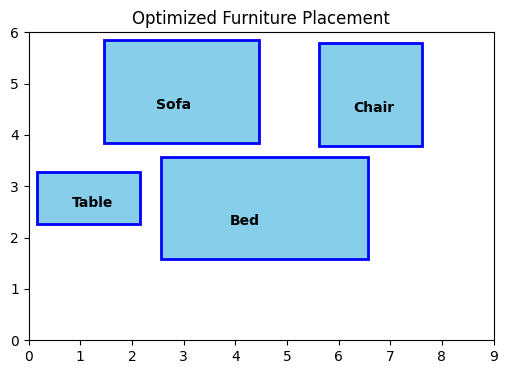

In [4]:
import numpy as np
import matplotlib.pyplot as plt

room_width = 9
room_height = 6

# Furniture items (name, width, height)
furniture = [
    ("Bed", 4, 2),
    ("Sofa", 3, 2),
    ("Table", 2, 1),
    ("Chair", 2, 2),
]


num_generations = 1000
population_size = 50
mutation_rate = 0.2

def generate_initial_population():
    """Generate random furniture placements inside room."""
    population = []
    for _ in range(population_size):
        layout = []
        for name, w, h in furniture:
            x = np.random.uniform(0, room_width - w)
            y = np.random.uniform(0, room_height - h)
            layout.append((name, w, h, x, y))
        population.append(layout)
    return population

def check_overlap(f1, f2):
    """Returns True if two furniture pieces overlap."""
    _, w1, h1, x1, y1 = f1
    _, w2, h2, x2, y2 = f2

    return not (x1 + w1 <= x2 or x2 + w2 <= x1 or y1 + h1 <= y2 or y2 + h2 <= y1)

def fitness_function(layout):
    """Calculates fitness score. Lower is better."""
    overlap_penalty = 0
    for i in range(len(layout)):
        for j in range(i + 1, len(layout)):
            if check_overlap(layout[i], layout[j]):
                overlap_penalty += 1  

    return overlap_penalty  

def mutate(layout):
    """Mutate layout by slightly shifting furniture positions."""
    mutated_layout = []
    for item in layout:
        name, w, h, x, y = item
        if np.random.rand() < mutation_rate:
            x = max(0, min(room_width - w, x + np.random.uniform(-0.5, 0.5)))
            y = max(0, min(room_height - h, y + np.random.uniform(-0.5, 0.5)))
        mutated_layout.append((name, w, h, x, y))
    return mutated_layout

def evolve_population(population):
    """Run genetic algorithm for multiple generations."""
    for _ in range(num_generations):
        population.sort(key=fitness_function)
        new_population = population[:10] 
        while len(new_population) < population_size:
            parent = population[np.random.randint(0, 10)]
            child = mutate(parent)
            new_population.append(child)
        population = new_population
    return population[0]  

def plot_layout(layout):
    """Plot the optimized furniture placement."""
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(0, room_width)
    ax.set_ylim(0, room_height)
    ax.set_title("Optimized Furniture Placement")

    for name, w, h, x, y in layout:
        ax.add_patch(plt.Rectangle((x, y), w, h, facecolor="skyblue", edgecolor="blue", lw=2))
        ax.text(x + w/3, y + h/3, name, fontsize=10, weight='bold')

    plt.show()

population = generate_initial_population()
best_layout = evolve_population(population)

plot_layout(best_layout)